In [5]:
import warnings;
warnings.filterwarnings('ignore');
warnings.simplefilter('ignore')
import pandas as pd
data = pd.read_csv('trump.csv', error_bad_lines= False, sep =';', encoding='cp1252');
data.to_csv("trump_modified")
#data['text'].unique()
#data


b'Skipping line 11: expected 7 fields, saw 8\nSkipping line 42: expected 7 fields, saw 9\nSkipping line 57: expected 7 fields, saw 8\nSkipping line 72: expected 7 fields, saw 8\nSkipping line 73: expected 7 fields, saw 8\nSkipping line 77: expected 7 fields, saw 8\nSkipping line 99: expected 7 fields, saw 8\nSkipping line 110: expected 7 fields, saw 8\nSkipping line 111: expected 7 fields, saw 8\nSkipping line 118: expected 7 fields, saw 8\nSkipping line 138: expected 7 fields, saw 8\nSkipping line 156: expected 7 fields, saw 10\nSkipping line 159: expected 7 fields, saw 8\nSkipping line 163: expected 7 fields, saw 8\nSkipping line 176: expected 7 fields, saw 8\nSkipping line 177: expected 7 fields, saw 8\nSkipping line 178: expected 7 fields, saw 9\nSkipping line 182: expected 7 fields, saw 8\nSkipping line 183: expected 7 fields, saw 8\nSkipping line 185: expected 7 fields, saw 8\nSkipping line 206: expected 7 fields, saw 10\nSkipping line 220: expected 7 fields, saw 8\nSkipping line

In [6]:
data_new = data.drop_duplicates(subset='id_str', keep="first")
#data_new
len(data_new['id_str'].unique().tolist())

31581

In [7]:
data_new = data_new.dropna()
#data_new

In [8]:
data_new = data_new.reset_index(drop=True)
data_new.to_csv("final.csv")
#data_new

In [9]:
data_new["text"] = data_new["text"].str.replace('http\S+|www.\S+', '', case=False)

#df['status_message'] = df['status_message'].str.replace('http\S+|www.\S+', '', case=False)

In [10]:
data_text= data_new.text.tolist()

In [11]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

In [12]:
import spacy
#spacy.load('en')
from spacy.lang.en import English
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [13]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\s165867\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\s165867\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [16]:
import random
text_data = []
for line in data_new["text"]:
        tokens = prepare_text_for_lda(line)
        text_data.append(tokens)

In [17]:
text_data

[['great',
  'republican',
  'senator',
  'ineffective',
  'border',
  'security',
  'without',
  'strong',
  'border',
  'country',
  'voter',
  'board',
  'strong',
  'smart',
  'democrat',
  'border',
  'crime'],
 ['former',
  'senator',
  'harry',
  'throw',
  'working',
  'fail',
  'career',
  'deception',
  'replace',
  'another',
  'beauty',
  'cryin’',
  'chuck',
  'schumer',
  'things',
  'never',
  'change'],
 ['meeting',
  'breakfast',
  'nation',
  'governor',
  'vietnam',
  'important',
  'summit',
  'complete',
  'denuclearization',
  'north',
  'korea',
  'rapidly',
  'become',
  'economic',
  'powerhouse',
  'without',
  'chairman',
  'decision'],
 ['funny',
  'watch',
  'people',
  'fail',
  'years',
  'nothing',
  'telling',
  'negotiate',
  'north',
  'korea'],
 ['admin',
  'commit',
  'ensure',
  'american',
  'skill',
  'need',
  'secure',
  'better',
  'strong',
  'economy'],
 ['price', 'getting', 'please', 'relax', 'world', 'price', 'fragile'],
 ['spike',
  'coul

In [18]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [19]:
import gensim
NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
print(ldamodel)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

LdaModel(num_terms=22416, num_topics=10, decay=0.5, chunksize=2000)
(0, '0.158*"great" + 0.073*"thank" + 0.038*"america" + 0.019*"trump2016" + 0.019*"today" + 0.018*"friend" + 0.017*"tower" + 0.016*"congratulations" + 0.013*"morning" + 0.012*"honor"')
(1, '0.135*"trump" + 0.096*"thanks" + 0.054*"donald" + 0.053*"president" + 0.022*"would" + 0.016*"please" + 0.016*"country" + 0.014*"america" + 0.013*"need" + 0.013*"hotel"')
(2, '0.043*"watch" + 0.023*"season" + 0.017*"interest" + 0.015*"really" + 0.013*"building" + 0.013*"trumpvlog" + 0.012*"people" + 0.012*"thought" + 0.011*"rating" + 0.011*"smart"')
(3, '0.029*"think" + 0.017*"price" + 0.014*"money" + 0.013*"american" + 0.013*"obama" + 0.013*"create" + 0.012*"right" + 0.012*"waste" + 0.011*"video" + 0.010*"economy"')
(4, '0.019*"looking" + 0.019*"discuss" + 0.018*"timetogettough" + 0.017*"forward" + 0.016*"house" + 0.014*"scotland" + 0.013*"china" + 0.012*"focus" + 0.011*"record" + 0.011*"white"')
(5, '0.056*"interview" + 0.048*"tonig

In [20]:
import gensim
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [406]:
import gensim
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=[0.01]*10,
                                           eta=[0.01]*len(dictionary.keys()))

In [407]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.172*"obama" + 0.075*"people" + 0.068*"world" + 0.061*"economy" + 0.045*"right" + 0.037*"want" + 0.037*"every" + 0.034*"million" + 0.032*"better" + 0.030*"economic"'), (1, '0.150*"national" + 0.085*"threat" + 0.066*"enemy" + 0.065*"wonderful" + 0.050*"claim" + 0.046*"thinking" + 0.044*"decision" + 0.039*"negotiate" + 0.037*"committee" + 0.029*"massive"'), (2, '0.303*"china" + 0.139*"american" + 0.069*"fantastic" + 0.067*"continue" + 0.057*"state" + 0.047*"beautiful" + 0.033*"return" + 0.031*"meeting" + 0.025*"future" + 0.024*"higher"'), (3, '0.201*"country" + 0.086*"dollar" + 0.081*"billion" + 0.063*"smart" + 0.056*"security" + 0.049*"strong" + 0.047*"building" + 0.046*"build" + 0.041*"democrat" + 0.032*"....."'), (4, '0.086*"never" + 0.085*"another" + 0.077*"money" + 0.070*"price" + 0.067*"business" + 0.050*"amaze" + 0.048*"spend" + 0.045*"campaign" + 0.041*"call" + 0.035*"getting"'), (5, '0.301*"great" + 0.144*"america" + 0.139*"today" + 0.037*"release" + 0.036*"unemployment" 

In [21]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=10,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='batch',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer=CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum read occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{2,}'  # num chars > 2
                            )

In [29]:
tf = tf_vectorizer.fit_transform(data_new.text)

In [30]:
lda_output = lda_model.fit_transform(tf)

In [31]:
print("Log Likelihood: ", lda_model.score(tf))

Log Likelihood:  -2174793.647204955


In [32]:
print("Perplexity: ", lda_model.perplexity(tf))

Perplexity:  1321.1903744257966


In [415]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=6):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [416]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
model_list, coherence_values = compute_coherence_values(dictionary = dictionary, corpus=corpus, texts = text_data, start=2, limit=40, step=6)
print(coherence_values)

[0.33622399654997837, 0.3629589105667633, 0.332310087345195, 0.3363787944147456, 0.3349966128414231, 0.3478737273587498, 0.3667568011511376]


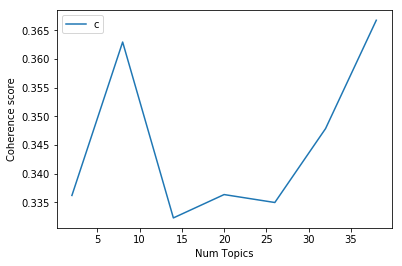

In [417]:
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [33]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV

# Define Search Param
search_params = {'n_components': [10,20,30,40,50], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(tf)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_components': [10, 20, 30, 40, 50], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
best_lda_model = model.best_estimator_
#best_lda_model


In [35]:
print("Best Model's Params: ", model.best_params_)


Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}


In [36]:
print("Best Log Likelihood Score: ", model.best_score_)

Best Log Likelihood Score:  -820067.525536819


In [37]:
print("Model Perplexity: ", best_lda_model.perplexity(tf))

Model Perplexity:  1375.3761122287865


In [ ]:
gscore = model.fit(tf).cv_results_
print(gscore)

In [ ]:
print(gscore['params'])

In [ ]:
print(gscore['mean_test_score'])

In [ ]:
n_components = [10, 20, 30, 40,50]
log_likelyhoods_5 = [gscore['mean_test_score'][gscore['params'].index(v)] for v in gscore['params'] if v['learning_decay']==0.5]
#print(log_likelyhoods_5)
log_likelyhoods_7 = [gscore['mean_test_score'][gscore['params'].index(v)] for v in gscore['params'] if v['learning_decay']==0.7]
log_likelyhoods_9 = [gscore['mean_test_score'][gscore['params'].index(v)] for v in gscore['params'] if v['learning_decay']==0.9]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(n_components, log_likelyhoods_5, label='0.5')
plt.plot(n_components, log_likelyhoods_7, label='0.7')
plt.plot(n_components, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [39]:
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, tf, tf_vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
9       95.163185  368.152313       1        1  13.252836
6     -286.867523 -208.625092       2        1  12.567058
3     -118.385368 -463.043213       3        1  11.913810
2      251.130386  108.831482       4        1  11.326675
0      402.709595 -152.947678       5        1  11.095180
7       54.686436 -168.432053       6        1   9.277082
8     -427.940186   61.831718       7        1   8.828617
5      -86.564445   71.505249       8        1   8.537078
4      217.841522 -433.876923       9        1   6.873591
1     -240.481171  342.559875      10        1   6.328072, topic_info=     Category         Freq             Term        Total  loglift  logprob
2995  Default  8284.000000  realdonaldtrump  8284.000000  30.0000  30.0000
1396  Default  2942.000000            false  2942.000000  29.0000  29.0000
3819  Default  2919.000000          twitter  2919.000000  28.0000  28.0000
279   Default  1610.000000          android  1610.000000  27.0000  27.0000
3641  Default  2093.000000            thank  2093.000000  26.0000  26.0000
3643  Default  1988.000000           thanks  1988.000000  25.0000  25.0000
3762  Default  4805.000000            trump  4805.000000  24.0000  24.0000
2535  Default  1381.000000              new  1381.000000  23.0000  23.0000
772   Default   903.000000           client   903.000000  22.0000  22.0000
3987  Default   900.000000              web   900.000000  21.0000  21.0000
1651  Default  4739.000000            great  4739.000000  20.0000  20.0000
2854  Default  2195.000000        president  2195.000000  19.0000  19.0000
52    Default   934.000000             2013   934.000000  18.0000  18.0000
2584  Default  1481.000000            obama  1481.000000  17.0000  17.0000
54    Default   748.000000             2015   748.000000  16.0000  16.0000
1159  Default  1676.000000           donald  1676.000000  15.0000  15.0000
3184  Default  1005.000000              run  1005.000000  14.0000  14.0000
3764  Default   825.000000        trump2016   825.000000  13.0000  13.0000
1761  Default   715.000000          hillary   715.000000  12.0000  12.0000
12    Default   845.000000               10   845.000000  11.0000  11.0000
20    Default   689.000000               11   689.000000  10.0000  10.0000
26    Default   695.000000               12   695.000000   9.0000   9.0000
1158  Default  1176.000000              don  1176.000000   8.0000   8.0000
3176  Default  1107.000000               rt  1107.000000   7.0000   7.0000
44    Default   574.000000               20   574.000000   6.0000   6.0000
1936  Default   462.000000        interview   462.000000   5.0000   5.0000
269   Default  1465.000000          america  1465.000000   4.0000   4.0000
1618  Default   442.000000             golf   442.000000   3.0000   3.0000
3     Default   601.000000               01   601.000000   2.0000   2.0000
40    Default   516.000000               18   516.000000   1.0000   1.0000
...       ...          ...              ...          ...      ...      ...
51    Topic10   190.051186             2012   234.022315   2.5521  -4.6128
881   Topic10    33.858731         consumer    39.111736   2.6159  -6.3379
40    Topic10   317.371028               18   516.069005   2.2740  -4.1000
52    Topic10   517.767189             2013   934.660961   2.1695  -3.6106
2638  Topic10    19.937880           orders    22.259784   2.6500  -6.8675
41    Topic10   267.172820               19   465.959743   2.2040  -4.2722
44    Topic10   297.124266               20   574.768211   2.1004  -4.1659
35    Topic10   241.966099               15   511.026837   2.0126  -4.3713
2255  Topic10    71.485077           losers   113.047141   2.3019  -5.5906
1396  Topic10   821.346069            false  2942.259226   1.4842  -3.1492
37    Topic10   195.461379               16   443.350891   1.9412  -4.5847
3819  Topic10   717.084940          

In [379]:
lda_output = best_lda_model.transform(tf)
# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
# index names
#docnames = ["Doc" + str(i) for i in range(len(data_new.text))]
# Make the pandas dataframe
import numpy as np
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
0,0.34,0.18,0.00,0.00,0.00,0.00,0.00,0.45,0.00,0.00,7
1,0.30,0.32,0.00,0.00,0.00,0.22,0.14,0.00,0.00,0.00,1
2,0.00,0.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
3,0.01,0.64,0.01,0.01,0.30,0.01,0.01,0.01,0.01,0.01,1
4,0.41,0.01,0.01,0.01,0.01,0.01,0.01,0.53,0.01,0.01,7
5,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.90,9
6,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.59,0.00,0.13,7
7,0.01,0.01,0.01,0.01,0.09,0.58,0.01,0.27,0.01,0.01,5
8,0.00,0.09,0.00,0.00,0.00,0.00,0.00,0.88,0.00,0.00,7
9,0.01,0.83,0.01,0.01,0.01,0.13,0.01,0.01,0.01,0.01,1


In [380]:
df_document_topic["dominant_topic"] = df_document_topic["dominant_topic"].replace(0, "obama,just,don,want,people,realdonaldtrump,president,rt,know,like")
df_document_topic["dominant_topic"] = df_document_topic["dominant_topic"].replace(1, "china,people,time,trade,country,deal,just,bad,north,big")
df_document_topic["dominant_topic"] = df_document_topic["dominant_topic"].replace(2, "client,web,happy,good,true,cont,2012,18,20,birthday")
df_document_topic["dominant_topic"] = df_document_topic["dominant_topic"].replace(3, "twitter,false,android,realdonaldtrump,2013,2015,10,12,11,01")
df_document_topic["dominant_topic"] = df_document_topic["dominant_topic"].replace(4, "realdonaldtrump,presiden,	trump,great,run,thanks,love,thank,mr,need")
df_document_topic["dominant_topic"] = df_document_topic["dominant_topic"].replace(5, "hillary,clinton,night,campaign,tonight,crooked,watch,just,news,did")
df_document_topic["dominant_topic"] = df_document_topic["dominant_topic"].replace(6, "thank,new,great,makeamericagreatagain,trump2016,forward,poll,just,morning,tomorrow")
df_document_topic["dominant_topic"] = df_document_topic["dominant_topic"].replace(7, "great,america,make,rt,today,country,thank,people,jobs,vote")
df_document_topic["dominant_topic"] = df_document_topic["dominant_topic"].replace(8, "trump,donald,realdonaldtrump,great,golf,course,best,beautiful,hotel,thank")
df_document_topic["dominant_topic"] = df_document_topic["dominant_topic"].replace(9, "thanks,think,realdonaldtrump,work,like,barackobama,big,success,obama,good")

In [381]:
df_document_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
0,0.34,0.18,0.00,0.00,0.00,0.00,0.00,0.45,0.00,0.00,"great,america,make,rt,today,country,thank,peop..."
1,0.30,0.32,0.00,0.00,0.00,0.22,0.14,0.00,0.00,0.00,"china,people,time,trade,country,deal,just,bad,..."
2,0.00,0.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"china,people,time,trade,country,deal,just,bad,..."
3,0.01,0.64,0.01,0.01,0.30,0.01,0.01,0.01,0.01,0.01,"china,people,time,trade,country,deal,just,bad,..."
4,0.41,0.01,0.01,0.01,0.01,0.01,0.01,0.53,0.01,0.01,"great,america,make,rt,today,country,thank,peop..."
5,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.90,"thanks,think,realdonaldtrump,work,like,baracko..."
6,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.59,0.00,0.13,"great,america,make,rt,today,country,thank,peop..."
7,0.01,0.01,0.01,0.01,0.09,0.58,0.01,0.27,0.01,0.01,"hillary,clinton,night,campaign,tonight,crooked..."
8,0.00,0.09,0.00,0.00,0.00,0.00,0.00,0.88,0.00,0.00,"great,america,make,rt,today,country,thank,peop..."
9,0.01,0.83,0.01,0.01,0.01,0.13,0.01,0.01,0.01,0.01,"china,people,time,trade,country,deal,just,bad,..."


df_document_topic.to_csv("topic_grid.csv")

In [ ]:
df_document_topic.to_csv("topic_grid_without_numbers.csv")

In [375]:
df_topic_keywords = pd.DataFrame(best_lda_model.components_/best_lda_model.components_.sum(axis=1)[:,np.newaxis])
# Assign Column and Index
df_topic_keywords.columns = tf_vectorizer.get_feature_names()
df_topic_keywords.index = topicnames
#df_topic_keywords

In [373]:
def show_lda_topics(lda_model=lda_model, n_words=5):
    keywords = np.array(df_topic_keywords.columns)
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_lda_topics(lda_model=best_lda_model, n_words=10)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,obama,just,don,want,people,realdonaldtrump,president,rt,know,like
Topic 1,china,people,time,trade,country,deal,just,bad,north,big
Topic 2,client,web,happy,good,true,cont,2012,18,20,birthday
Topic 3,twitter,false,android,realdonaldtrump,2013,2015,10,12,11,01
Topic 4,realdonaldtrump,president,trump,great,run,thanks,love,thank,mr,need
Topic 5,hillary,clinton,night,campaign,tonight,crooked,watch,just,news,did
Topic 6,thank,new,great,makeamericagreatagain,trump2016,forward,poll,just,morning,tomorrow
Topic 7,great,america,make,rt,today,country,thank,people,jobs,vote
Topic 8,trump,donald,realdonaldtrump,great,golf,course,best,beautiful,hotel,thank
Topic 9,thanks,think,realdonaldtrump,work,like,barackobama,big,success,obama,good


In [120]:
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=15))

[(0, '0.051*"interview" + 0.040*"tonight" + 0.031*"great" + 0.025*"watch" + 0.023*"night" + 0.019*"discuss" + 0.016*"tomorrow" + 0.015*"looking" + 0.014*"enjoy" + 0.014*"forward" + 0.013*"morning" + 0.012*"fantastic" + 0.012*"today" + 0.012*"going" + 0.011*"rating"'), (1, '0.120*"trump" + 0.053*"donald" + 0.039*"obama" + 0.015*"president" + 0.013*"debate" + 0.013*"tower" + 0.012*"scotland" + 0.010*"attack" + 0.009*"would" + 0.007*"thanks" + 0.007*"create" + 0.007*"national" + 0.007*"hotel" + 0.007*"never" + 0.006*"want"'), (2, '0.059*"great" + 0.026*"celebrity" + 0.016*"america" + 0.014*"country" + 0.012*"charity" + 0.012*"budget" + 0.010*"record" + 0.010*"deficit" + 0.008*"love" + 0.008*"people" + 0.008*"yesterday" + 0.008*"release" + 0.008*"never" + 0.007*"surprise" + 0.007*"military"'), (3, '0.022*"course" + 0.019*"success" + 0.018*"obama" + 0.017*"amaze" + 0.014*"season" + 0.011*"house" + 0.010*"interest" + 0.010*"spending" + 0.010*"record" + 0.009*"republican" + 0.009*"china" + 0.

In [124]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_text)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.to_csv("comparsion1.csv")
# Show
df_dominant_topic
#df_dominant_topic.to_csv("comparsion.csv")

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.6321,"great, celebrity, america, country, charity, b...",I hope our great Republican Senators don’t get...
1,1,5.0,0.3803,"thank, great, obamacare, business, loser, tax,...",Former Senator Harry Reid (he got thrown out) ...
2,2,0.0,0.4106,"interview, tonight, great, watch, night, discu...",Meeting for breakfast with our Nation’s Govern...
3,3,1.0,0.3779,"trump, donald, obama, president, debate, tower...",RT @realDonaldTrump: So funny to watch people ...
4,4,1.0,0.4684,"trump, donald, obama, president, debate, tower...",RT @IvankaTrump: This Admin is committed to en...
5,5,6.0,0.7153,"please, sunday, doral, wonder, march, remember...","Oil prices getting too high. OPEC, please rela..."
6,6,9.0,0.6941,"twitter, president, think, would, trump, count...","Be nice if Spike Lee could read his notes, or ..."
7,7,2.0,0.2395,"great, celebrity, america, country, charity, b...",RT @realDonaldTrump: Highly respected Senator ...
8,8,2.0,0.8247,"great, celebrity, america, country, charity, b...",We have a State of Emergency at our Southern B...
9,9,4.0,0.3380,"trumpvlog, answer, question, worst, obama, pri...",I am pleased to report that the U.S. has made ...


In [306]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_text)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.to_csv("comparsion1.csv")
# Show
df_dominant_topic
#df_dominant_topic.to_csv("comparsion.csv")

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.4354,"world, country, price, always, could, every, y...",I hope our great Republican Senators don’t get...
1,1,5.0,0.4967,"republican, want, washington, party, force, pl...",Former Senator Harry Reid (he got thrown out) ...
2,2,4.0,0.6620,"today, thanks, business, economic, raise, grea...",Meeting for breakfast with our Nation’s Govern...
3,3,6.0,0.5506,"watch, never, another, money, release, amaze, ...",RT @realDonaldTrump: So funny to watch people ...
4,4,3.0,0.4954,"china, record, economy, would, yesterday, frie...",RT @IvankaTrump: This Admin is committed to en...
5,5,8.0,0.7863,"world, country, price, always, could, every, y...","Oil prices getting too high. OPEC, please rela..."
6,6,9.0,0.6115,"obama, interview, million, unemployment, campa...","Be nice if Spike Lee could read his notes, or ..."
7,7,9.0,0.6574,"obama, interview, million, unemployment, campa...",RT @realDonaldTrump: Highly respected Senator ...
8,8,2.0,0.5414,"right, government, national, waste, already, s...",We have a State of Emergency at our Southern B...
9,9,4.0,0.4141,"today, thanks, business, economic, raise, grea...",I am pleased to report that the U.S. has made ...


In [219]:
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
from pprint import pprint

%matplotlib inline

In [220]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [221]:
lsimodel.show_topics(num_topics=5) 

[(0,
  '0.913*"twitter" + 0.163*"great" + 0.135*"trump" + 0.121*"people" + 0.089*"country" + 0.081*"border" + 0.062*"president" + 0.060*"would" + 0.052*"democrat" + 0.052*"immigration"'),
 (1,
  '0.667*"trump" + 0.546*"great" + -0.292*"twitter" + 0.215*"donald" + 0.173*"president" + 0.128*"america" + 0.111*"thank" + 0.081*"would" + 0.075*"country" + 0.069*"people"'),
 (2,
  '0.710*"great" + -0.614*"trump" + -0.206*"donald" + 0.107*"people" + 0.094*"america" + -0.091*"twitter" + 0.070*"country" + 0.069*"border" + -0.062*"president" + 0.058*"thank"'),
 (3,
  '0.338*"border" + 0.335*"people" + 0.303*"country" + -0.286*"great" + 0.228*"president" + -0.218*"twitter" + 0.207*"democrat" + 0.176*"would" + 0.159*"immigration" + 0.152*"crime"'),
 (4,
  '0.709*"president" + 0.331*"thank" + 0.300*"would" + -0.220*"trump" + 0.216*"obama" + -0.174*"border" + -0.127*"people" + -0.103*"great" + 0.094*"thanks" + -0.094*"democrat"')]

In [ ]:
lsitopics = lsimodel.show_topics(formatted=False)

In [222]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)
hdpmodel.show_topics()

C:\Users\s165867\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\hdpmodel.py:467: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  start_time = time.clock()


[(0,
  '0.021*twitter + 0.018*trump + 0.017*great + 0.008*president + 0.007*people + 0.007*would + 0.006*america + 0.006*country + 0.006*donald + 0.006*thank + 0.005*obama + 0.005*thanks + 0.004*think + 0.004*going + 0.004*never + 0.003*today + 0.003*really + 0.003*hillary + 0.003*american + 0.003*world'),
 (1,
  '0.004*great + 0.003*trump + 0.002*twitter + 0.002*country + 0.002*people + 0.002*president + 0.001*would + 0.001*border + 0.001*thank + 0.001*obama + 0.001*today + 0.001*thanks + 0.001*america + 0.001*american + 0.001*democrat + 0.001*china + 0.001*donald + 0.001*republican + 0.001*election + 0.001*never'),
 (2,
  '0.004*great + 0.003*trump + 0.002*state + 0.002*twitter + 0.002*thank + 0.001*president + 0.001*never + 0.001*thanks + 0.001*people + 0.001*would + 0.001*america + 0.001*obama + 0.001*debate + 0.001*unite + 0.001*country + 0.001*today + 0.001*world + 0.001*donald + 0.001*american + 0.001*trade'),
 (3,
  '0.007*twitter + 0.004*great + 0.004*trump + 0.002*america + 0

In [ ]:
hdptopics = hdpmodel.show_topics(formatted=False)

In [235]:
def evaluate_graph(dictionary, corpus, texts, limit):
    """
    Function to display num_topics - LDA graph using c_v coherence
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(1, limit)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lm_list, c_v

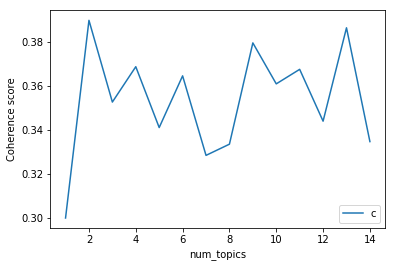

In [236]:
lmlist, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=text_data, limit=15)

In [230]:
ldatopics = ldamodel.show_topics(formatted=False)

In [229]:
lmtopics = lmlist.show_topics(formatted=False)

In [ ]:
#lda_lsi_topics = [[word for word, prob in lm.show_topic(topicid)] for topicid, c_v in top_topics]

In [244]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=text_data, dictionary=dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=text_data, dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=text_data, dictionary=dictionary, window_size=10).get_coherence()

lm_coherence = CoherenceModel(topics=lmtopics, texts=text_data, dictionary=dictionary, window_size=10).get_coherence()

#lda_lsi_coherence = CoherenceModel(topics=lda_lsi_topics[:10], texts=text_data, dictionary=dictionary, window_size=10).get_coherence()
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')


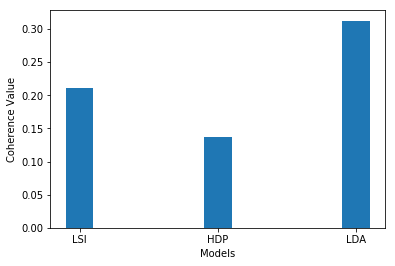

In [301]:
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence],
                   ['LSI', 'HDP', 'LDA'])